In [ ]:
from torchvision.datasets import FashionMNIST
import torchvision
import torch
from torchvision.transforms import transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader

In [ ]:
#Check if GPU is availale
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [1]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0/255.0,))]) # mean = 0, std = 1/255
# Load the FashionMNIST dataset
train_set = FashionMNIST(root = 'data',
                         train = True,
                         download = True,
                         transform = transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1024, num_workers=4, shuffle=True)
test_set = FashionMNIST(root = 'data',
                        train = False,
                        download = True,
                        transform = transform)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=1024, num_workers=4, shuffle=False)

#Print a sample of the data
img, _ = train_set[0]
print(img.size())
print(type(img))

torch.Size([1, 28, 28])
<class 'torch.Tensor'>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Function to display images
def show_images(image):
    fig = plt.figure(figsize = (9, 9))
    img = image.numpy()
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)

for i, (images, labels) in enumerate(data_loader, 0):
    plt.axis('off')
    show_images(torchvision.utils.make_grid(images[:8])) # Show the first 8 images in each batch, so we can break the loop
    break

--------------------------------------------------------------------------
NameError                                Traceback (most recent call last)
Cell In[19], line 8
      5     img = np.transpose(img, (1, 2, 0))
      6     plt.imshow(img)
----> 8 for i, (images, labels) in enumerate(data_loader, 0):
      9     plt.axis('off')
     10     show_images(torchvision.utils.make_grid(images[:8])) # Show the first 8 images in each batch, so we can break the loop

NameError: name 'data_loader' is not defined


# MODEL

In [3]:
# Define the model
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 10)
)
model = model.to(device)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [4]:
# Initialize the random weights of the model

input_tensor = torch.rand(5, 28, 28).to(device) # Create a random tensor of size 5 x 28 x 28, 5 images of 28 x 28 pixels
output = model(input_tensor)

print(f"Input tensor shape: {output.shape}")

Input tensor shape: torch.Size([5, 10])


# LOSS, OPTIMIZER, EVALUATION FUNCTIOn

In [ ]:
# Define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01) # SGD is stand for Stochastic Gradient Descent

In [ ]:
def evaluation(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    # in this case we don't need to calculate the gradients so we use torch.no_grad()
    with torch.no_grad():
        for images, labels in test_loader:
            #move the images and labels to the device the model is on
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() # item() is used to convert the tensor value to a python number
            
            _, predicted = torch.max(outputs.data, 1) # Get the predicted class with the highest probalility
            #print(f'Shape of predicted: {predicted.shape}')
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    test_loss = test_loss / len(test_loader) # Average loss

    return test_loss, accuracy
    

In [5]:
test_loss, accuracy = evaluation(model, test_loader, criterion)
print(f'Test loss: {test_loss}')
print(f'Accuracy: {accuracy}')

Test loss: 69.58438110351562
Accuracy: 16.15


In [6]:
#train

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
epochs = 100

for  epoch in range(epochs):
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples    
    for i, (images, labels) in enumerate(train_loader, 0):
        #move input and labels to the device
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients

        optimizer.zero_grad()
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine the predicted classes
        _, predicted = torch.max(outputs, 1) # Get the predicted values with every sample
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()
        # Backward
        loss.backward()
        optimizer.step()
    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / len(train_loader)
    test_loss, test_accuracy = evaluation(model, test_loader, criterion)
    print(f'Epoch: {epoch + 1} / {epochs}: Train Loss: {epoch_loss:.4f} Train Accuracy: {epoch_accuracy:.4f} Test Loss: {test_loss:4f} Test Accuracy: {test_accuracy:4f}')

    train_losses.append(epoch_loss)
    test_losses.append(test_loss)
    train_accuracies.append(epoch_accuracy)
    test_accuracies.append(test_accuracy)
        

Epoch: 1 / 100: Train Loss: 4312.3934 Train Accuracy: 57.2483 Test Loss: 3019.274609 Test Accuracy: 67.340000
Epoch: 2 / 100: Train Loss: 1697.6587 Train Accuracy: 71.3800 Test Loss: 1067.431708 Test Accuracy: 71.770000
Epoch: 3 / 100: Train Loss: 1597.6774 Train Accuracy: 71.6283 Test Loss: 1701.475867 Test Accuracy: 72.050000
Epoch: 4 / 100: Train Loss: 1234.5522 Train Accuracy: 75.0417 Test Loss: 1401.344446 Test Accuracy: 72.750000
Epoch: 5 / 100: Train Loss: 1282.9548 Train Accuracy: 74.4250 Test Loss: 1266.534570 Test Accuracy: 74.670000
Epoch: 6 / 100: Train Loss: 1116.8272 Train Accuracy: 76.2533 Test Loss: 1032.700110 Test Accuracy: 72.110000
Epoch: 7 / 100: Train Loss: 1158.0430 Train Accuracy: 75.4900 Test Loss: 1628.646960 Test Accuracy: 66.840000
Epoch: 8 / 100: Train Loss: 1112.7173 Train Accuracy: 76.0417 Test Loss: 818.633765 Test Accuracy: 76.000000
Epoch: 9 / 100: Train Loss: 1136.3721 Train Accuracy: 75.8867 Test Loss: 1822.551501 Test Accuracy: 70.670000
Epoch: 10 /

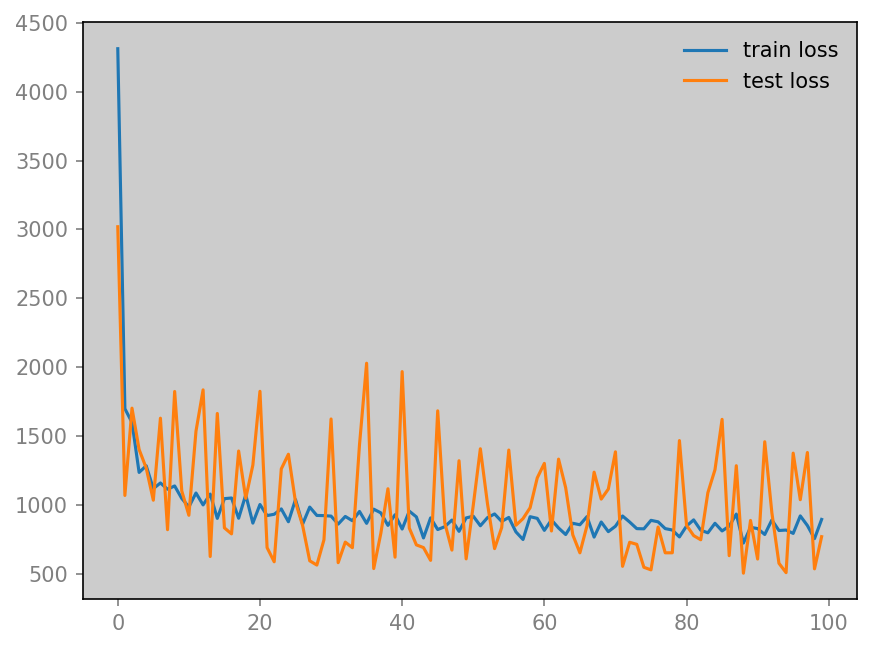

In [7]:
#Plot train and test losses

plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

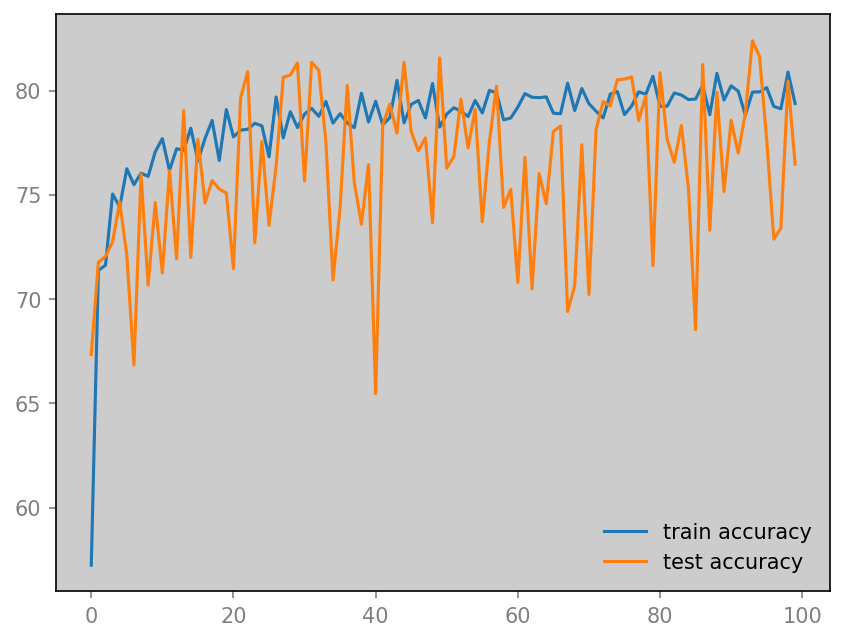

In [8]:
#Plot train and test accuracies
plt.plot(train_accuracies, label = 'train accuracy')
plt.plot(test_accuracies, label = 'test accuracy')
plt.legend()
plt.show()